# Exploratory Data Analysis for all jobs

In [79]:

import pandas as pd
from datasets import load_dataset
the_lukbarset=load_dataset('lukebarousse/data_jobs')
data_fram=the_lukbarset['train'].to_pandas()
data_fram['job_posted_date']=pd.to_datetime(data_fram.job_posted_date)
data_fram
data_fram1=data_fram.copy()
import ast
import matplotlib.pyplot as plt
data_fram1['job_skills']=data_fram1['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill)
data_fram1

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


## No of jobs for different roles

Text(0, 0.5, 'No of Jobs')

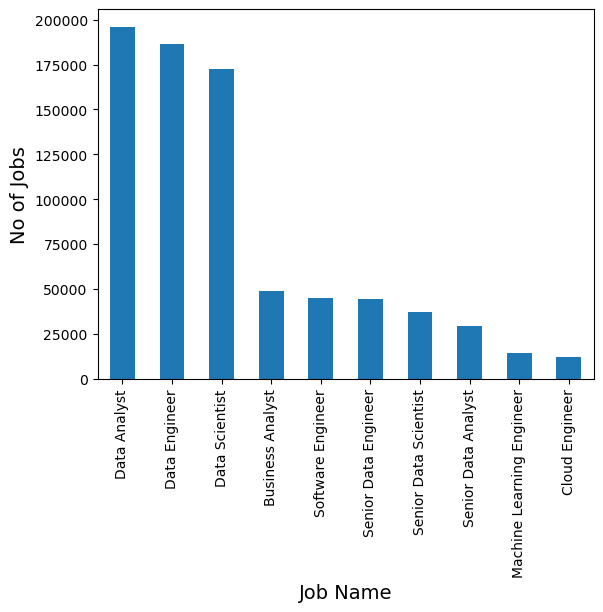

In [80]:
data_fram1['job_title_short'].value_counts().head(10).plot(kind='bar')
# this shows which jobs are more trending world wide
plt.xlabel(xlabel='Job Name',fontsize=14)
plt.ylabel(ylabel='No of Jobs',fontsize=14)

## Contries to Explore

Text(0.5, 0, 'Countries')

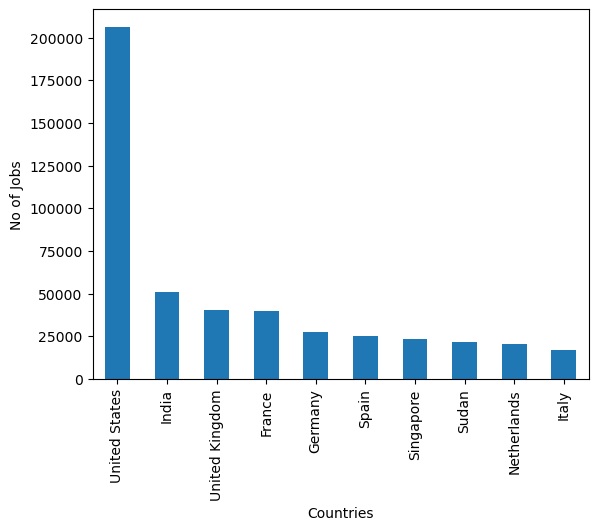

In [81]:
# lets see what contries have more job postings
data_fram1['job_country'].value_counts().head(10).plot(kind='bar')
plt.ylabel(ylabel='No of Jobs')
plt.xlabel(xlabel='Countries')

## Exploring Job types

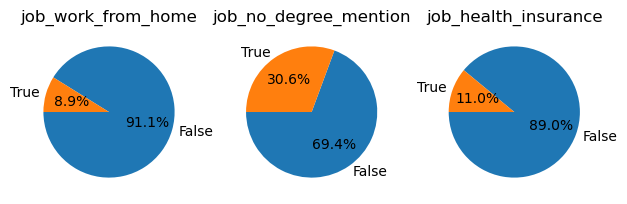

In [82]:
# we will create plots on the same page job_work_from_home  job_no_degree_mention	job_health_insurance
boolean_dataframe=data_fram1[['job_work_from_home','job_no_degree_mention','job_health_insurance']]
column_name=boolean_dataframe.columns.to_list()
fig ,ax=plt.subplots(1,3)
for i,name in enumerate(column_name):
    boolean_dataframe[name].value_counts().plot(kind="pie",ax=ax[i],startangle=180,autopct="%1.1f%%")
    ax[i].set_ylabel('')
    ax[i].set_title(name)


plt.tight_layout()
  


# Exploratory Data Analysis for Data Analysis Jobs in India

In [83]:
data_fram_India=data_fram1[(data_fram1['job_country']=='India') & (data_fram1['job_title_short']=='Data Analyst')]


## Top job locations in India for Data Analyst

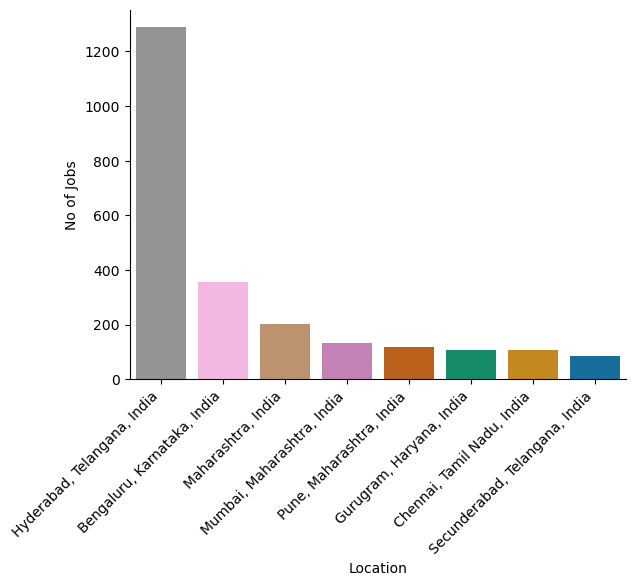

In [ ]:
import seaborn as sns
location_dataframe=data_fram_India['job_location'].value_counts().head(10)
location_dataframe.drop(['India','Anywhere'],axis=0,inplace=True) # I removed India and Anywhere from the city column 
location_dataframe=location_dataframe.reset_index()
sns.barplot(data=location_dataframe,x='job_location',y='count',palette='colorblind',hue='count')
plt.legend().remove()
plt.xticks(rotation=45,ha='right')
plt.Figure(figsize=(10,5))
plt.ylabel(ylabel='No of Jobs')
plt.xlabel(xlabel='Location')
sns.despine()



## Job details

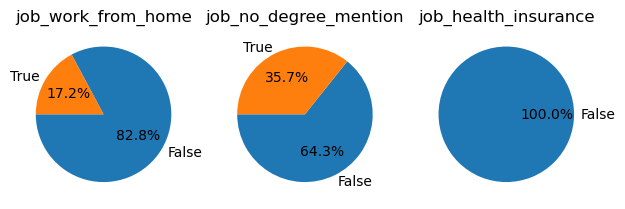

In [86]:
boolean_dataframe1=data_fram_India[['job_work_from_home','job_no_degree_mention','job_health_insurance']]
column_name1=boolean_dataframe1.columns.to_list()
fig ,ax=plt.subplots(1,3)
for i,name in enumerate(column_name):
    boolean_dataframe1[name].value_counts().plot(kind="pie",ax=ax[i],startangle=180,autopct="%1.1f%%")
    ax[i].set_ylabel('')
    ax[i].set_title(name)


plt.tight_layout()

## Plot on major companies hiring for DA in India

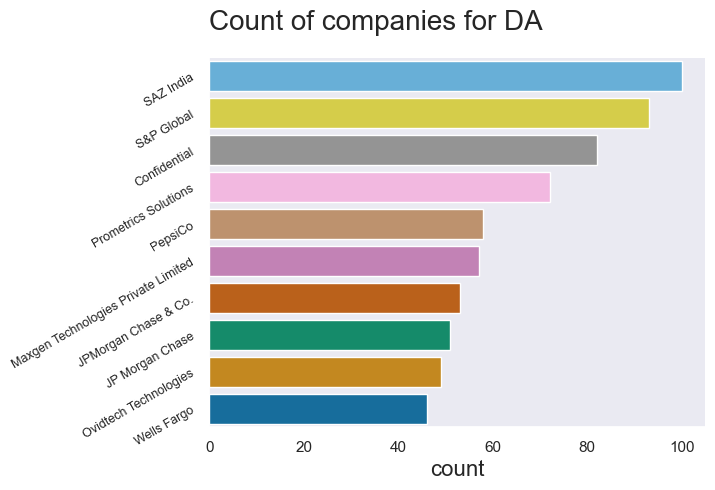

In [130]:
df_company=data_fram_India['company_name'].value_counts().head(10)
df_company=df_company.reset_index()
sns.barplot(data=df_company,y='company_name',x='count',palette='colorblind',hue='count')
sns.set_theme(style='dark')

plt.ylabel(ylabel='',fontsize=16)
plt.title('Count of companies for DA',fontsize=20,pad=20,loc='Left')
plt.xlabel(xlabel='count',fontsize=16)
plt.legend().remove()
plt.yticks(fontsize=9,rotation=30)
plt.Figure(figsize=(5,15))
sns.despine()
